In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

import re
from collections import Counter
import string
from string import digits as d, punctuation as p

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train.shape

(159571, 8)

In [5]:
test.head()

,Unnamed: 0,comment_text
0,0,Yo bitch Ja Rule is more succesful then you'll...
1,1,== From RfC == \n\n The title is fine as it is...
2,2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,3,":If you have a look back at the source, the in..."
4,4,I don't anonymously edit articles at all.


In [6]:
test.shape

(153164, 2)

In [7]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [8]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [9]:
train.iloc[:,2:].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [10]:
for columns in train.iloc[:,2:]:
    print (columns)

malignant
highly_malignant
rude
threat
abuse
loathe


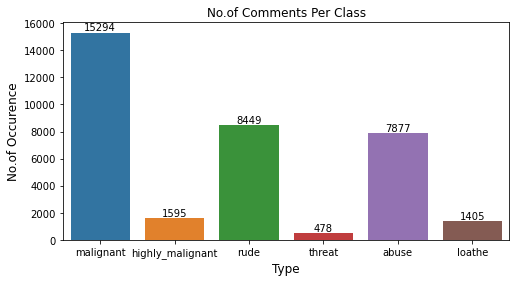

In [11]:
plt.figure(figsize = (8,4))
ax = sns.barplot(train.iloc[:,2:].sum().index,train.iloc[:,2:].sum().values)
plt.title("No.of Comments Per Class")
plt.xlabel("Type",fontsize = 12)
plt.ylabel("No.of Occurence",fontsize = 12)
rects = ax.patches
labels = train.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [12]:
# Create a bar graph 
sum_mal = train['malignant'].sum() / len(train) * 100
sum_highmal = train['highly_malignant'].sum() / len(train) * 100
sum_rude = train['rude'].sum() / len(train) * 100
sum_threat = train['threat'].sum() / len(train) * 100
sum_abuse = train['abuse'].sum() / len(train) * 100
sum_loathe = train['loathe'].sum() / len(train) * 100

In [13]:
# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

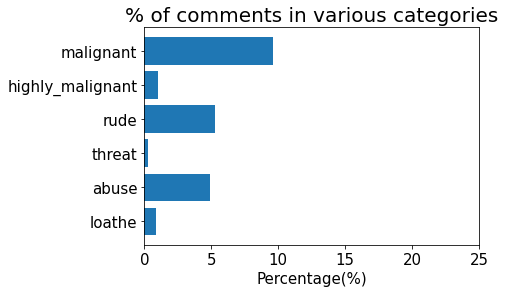

In [14]:
ax = plt.barh(ind, [sum_mal,sum_highmal,sum_rude,sum_threat,sum_abuse,sum_loathe])
plt.xlabel('Percentage(%)',size = 15)
plt.xticks(np.arange(0,30,5), size = 15)
plt.title('% of comments in various categories', size=20)
plt.yticks(ind,('malignant','highly_malignant','rude','threat','abuse','loathe'),size=15)
# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

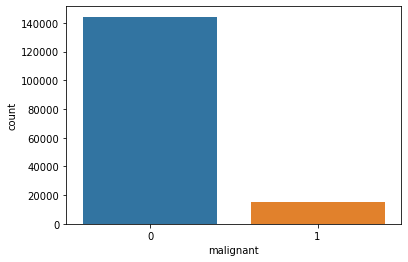

0    144277
1     15294
Name: malignant, dtype: int64


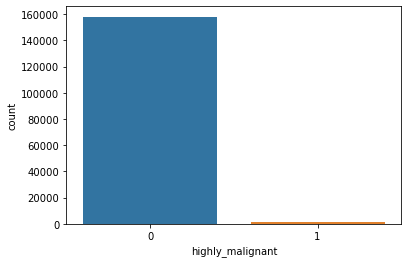

0    157976
1      1595
Name: highly_malignant, dtype: int64


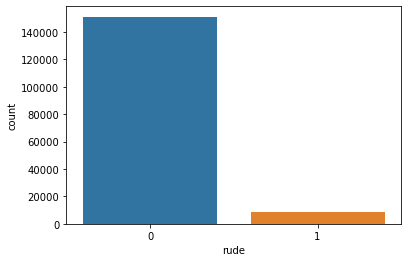

0    151122
1      8449
Name: rude, dtype: int64


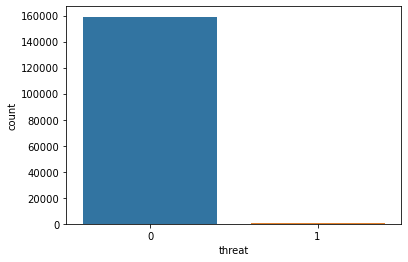

0    159093
1       478
Name: threat, dtype: int64


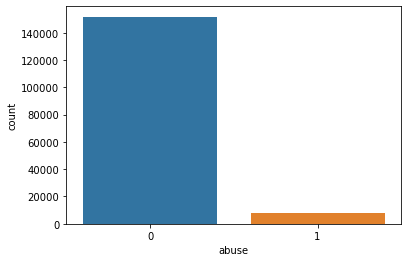

0    151694
1      7877
Name: abuse, dtype: int64


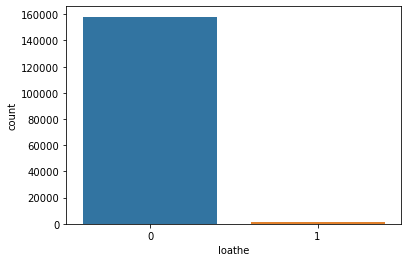

0    158166
1      1405
Name: loathe, dtype: int64


In [15]:
for columns in train.iloc[:,2:]:
    sns.countplot(train[columns])
    plt.show()
    print(train[columns].value_counts())

In [16]:
df = train.copy()

In [17]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [18]:
df.drop(['id'],axis=1,inplace = True)

In [19]:
#adding a new column which represent a normal statement

labels= ['malignant','highly_malignant','rude','threat','abuse','loathe']
df['normal']=1-df[labels].max(axis=1)

The column named 'normal' represents the columns which are not falling under 'malignant','highly_malignant','rude','threat','abuse','loathe' categories

In [20]:
#adding a column 'raw length' to the dataset which will show the length of characters in column 'comment_text'
df['raw_length'] = df.comment_text.str.len().astype('int64')
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,normal,raw_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67


In [21]:
#value counts of  label columns
values=['malignant','highly_malignant','rude','threat','abuse','loathe','normal']
for i in values:
    vc = df[i].value_counts()
    print('Value counts of',vc)

Value counts of 0    144277
1     15294
Name: malignant, dtype: int64
Value counts of 0    157976
1      1595
Name: highly_malignant, dtype: int64
Value counts of 0    151122
1      8449
Name: rude, dtype: int64
Value counts of 0    159093
1       478
Name: threat, dtype: int64
Value counts of 0    151694
1      7877
Name: abuse, dtype: int64
Value counts of 0    158166
1      1405
Name: loathe, dtype: int64
Value counts of 1    143346
0     16225
Name: normal, dtype: int64


In [22]:
#16225 is normal and rest 14336 is either maligant or rude or loathe etc...
values = [df.shape[0] - df.normal.sum(),df.normal.sum()]
values

[16225, 143346]

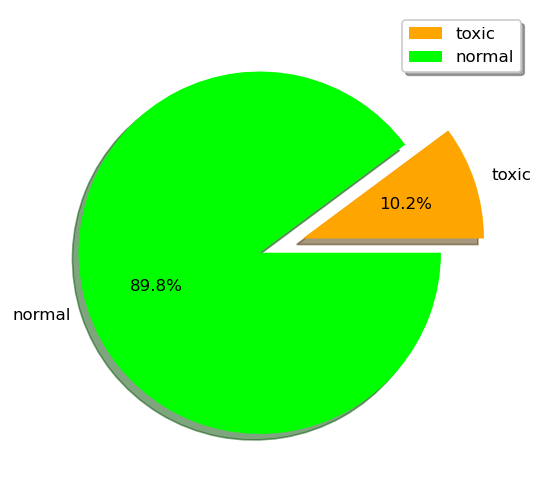

In [23]:
values = [df.shape[0] - df.normal.sum(),df.normal.sum()]
label = ['toxic','normal']
exp=(0.025,0)
clr=('orange','lime')
plt.figure(figsize=(5,5),dpi=120)
plt.pie(x=values,explode=(0,0.25),labels=label,colors=clr,autopct='%2.1f%%',radius=1,shadow=True)
plt.legend(shadow = True,fancybox=True)
plt.show()

In [24]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [25]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,normal,raw_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,1,264
1,d aww he matches this background colour i m s...,0,0,0,0,0,0,1,112
2,hey man i m really not trying to edit war it...,0,0,0,0,0,0,1,233
3,more i can t make any real suggestions on im...,0,0,0,0,0,0,1,622
4,you sir are my hero any chance you remember...,0,0,0,0,0,0,1,67
...,...,...,...,...,...,...,...,...,...
159566,and for the second time of asking when ...,0,0,0,0,0,0,1,295
159567,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,1,99
159568,spitzer umm theres no actual article for pr...,0,0,0,0,0,0,1,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,1,116


In [26]:
# # Separating the labels
df_data_mal = df.loc[:,['comment_text','malignant']]
df_data_hig = df.loc[:,['comment_text','highly_malignant']]
df_data_rude = df.loc[:,['comment_text','rude']]
df_data_thr = df.loc[:,['comment_text','threat']]
df_data_abu = df.loc[:,['comment_text','abuse']]
df_data_loa = df.loc[:,['comment_text','loathe']]

In [27]:
# Wordcloud for visualising most used words
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [28]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)
    wc.generate(" ".join(text))

    plt.figure(figsize=(25,25))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(random_state=244), alpha=0.98)

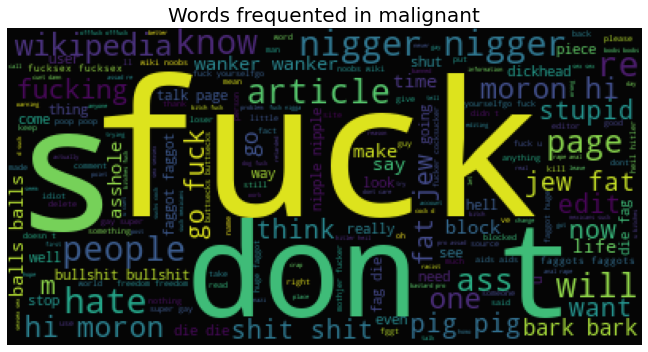

In [29]:
wordcloud(df_data_mal,'malignant')

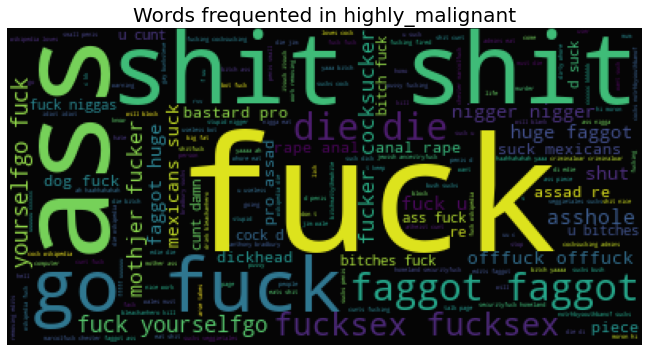

In [30]:
wordcloud(df_data_hig,'highly_malignant')

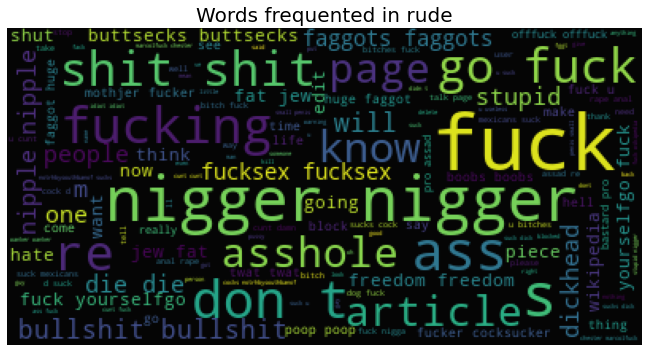

In [31]:
wordcloud(df_data_rude,'rude')

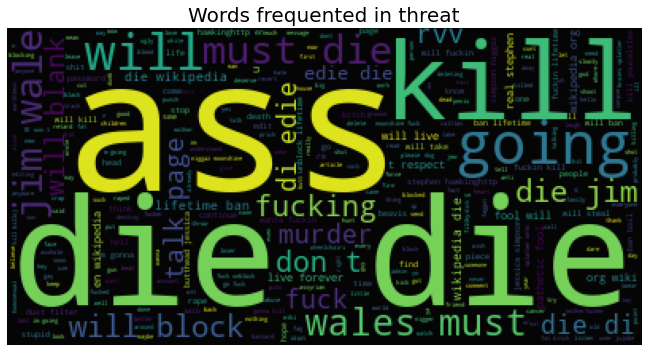

In [32]:
wordcloud(df_data_thr,'threat')

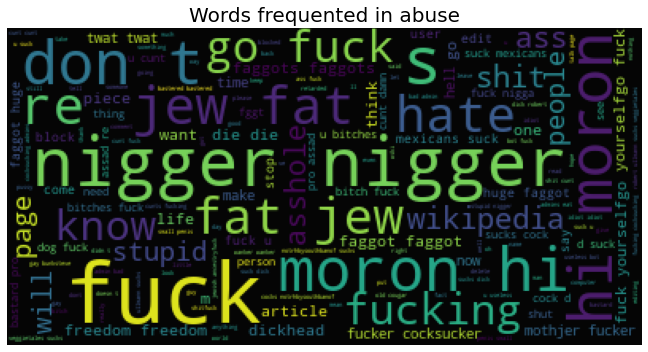

In [33]:
wordcloud(df_data_abu, 'abuse')

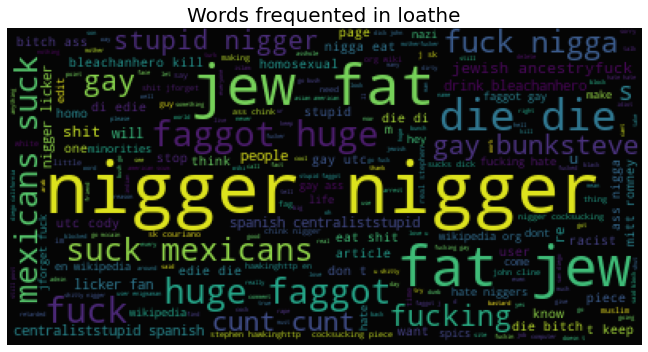

In [34]:
wordcloud(df_data_loa,'loathe')

In [35]:
# # Making the unbalanced data a balanced One
df_data_mal_1 = df_data_mal[df_data_mal['malignant'] == 1].iloc[0:5000,:]
df_data_mal_1.shape

(5000, 2)

In [36]:
df_data_mal_0 = df_data_mal[df_data_mal['malignant'] == 0].iloc[0:5000,:]
df_data_mal_0

,comment_text,malignant
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m s...,0
2,hey man i m really not trying to edit war it...,0
3,more i can t make any real suggestions on im...,0
4,you sir are my hero any chance you remember...,0
...,...,...
5544,electronic intifada is not an activist site w...,0
5545,new genre the new genre supernatural was use...,0
5547,translated as the second vatican council a ...,0
5549,purpose this rfc will be used to determine com...,0


In [37]:
df_data_mal_done = pd.concat([df_data_mal_1, df_data_mal_0], axis=0)
df_data_mal_done.shape

(10000, 2)

In [38]:
df_data_hig[df_data_hig['highly_malignant'] == 1].count()

comment_text        1595
highly_malignant    1595
dtype: int64

In [39]:
df_data_hig_1 = df_data_hig[df_data_hig['highly_malignant'] == 1].iloc[0:1595,:]
df_data_hig_0 = df_data_hig[df_data_hig['highly_malignant'] == 0].iloc[0:1595,:]
df_data_hig_done = pd.concat([df_data_hig_1, df_data_hig_0], axis=0)
df_data_hig_done.shape

(3190, 2)

In [40]:
df_data_rude[df_data_rude['rude'] == 1].count()

comment_text    8449
rude            8449
dtype: int64

In [41]:
df_data_rude_1 = df_data_rude[df_data_rude['rude'] == 1].iloc[0:5000,:]
df_data_rude_0 = df_data_rude[df_data_rude['rude'] == 0].iloc[0:5000,:]
df_data_rude_done = pd.concat([df_data_rude_1, df_data_rude_0], axis=0)
df_data_rude_done.shape

(10000, 2)

In [42]:
df_data_thr[df_data_thr['threat'] == 1].count()

comment_text    478
threat          478
dtype: int64

In [43]:
df_data_thr[df_data_thr['threat'] == 1].count()

comment_text    478
threat          478
dtype: int64

In [44]:
df_data_thr_1 = df_data_thr[df_data_thr['threat'] == 1].iloc[0:478,:]

In [45]:
# We include 1912 comments that have no threat so that the data with threat (478) will represent 20% of the dataset.
df_data_thr_0 = df_data_thr[df_data_thr['threat'] == 0].iloc[0:1912,:]  
df_data_thr_done = pd.concat([df_data_thr_1, df_data_thr_0], axis=0)
df_data_thr_done.shape

(2390, 2)

In [46]:
df_data_abu[df_data_abu['abuse'] == 1].count()

comment_text    7877
abuse           7877
dtype: int64

In [47]:
df_data_abu_1 = df_data_abu[df_data_abu['abuse'] == 1].iloc[0:5000,:]
df_data_abu_0 = df_data_abu[df_data_abu['abuse'] == 0].iloc[0:5000,:]
df_data_abu_done = pd.concat([df_data_abu_1, df_data_abu_0], axis=0)
df_data_abu_done.shape

(10000, 2)

In [48]:
df_data_loa_1 = df_data_loa[df_data_loa['loathe'] == 1].iloc[0:1405,:] # 20%
df_data_loa_0 = df_data_loa[df_data_loa['loathe'] == 0].iloc[0:5620,:] # 80%
df_data_loa_done = pd.concat([df_data_loa_1, df_data_loa_0], axis=0)
df_data_loa_done.shape

(7025, 2)

In [49]:
# # Model Building
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [50]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

In [51]:
df_mal_cv = cv_tf_train_test(df_data_mal_done, 'malignant', TfidfVectorizer, (1,1))
df_mal_cv.rename(columns={'F1 Score': 'F1 Score(malignant)'}, inplace=True)

df_mal_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(malignant)
Log Regression,0.860941
KNN,0.170616
BernoulliNB,0.776521
MultinomialNB,0.874958
SVM,0.876510
Random Forest,0.835621


In [52]:
df_hig_cv = cv_tf_train_test(df_data_hig_done, 'highly_malignant', TfidfVectorizer, (1,1))
df_hig_cv.rename(columns={'F1 Score': 'F1 Score(highly_malignant)'}, inplace=True)

df_hig_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(highly_malignant)
Log Regression,0.927879
KNN,0.837809
BernoulliNB,0.803707
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.927660


In [53]:
df_rude_cv = cv_tf_train_test(df_data_rude_done, 'rude', TfidfVectorizer, (1,1))
df_rude_cv.rename(columns={'F1 Score': 'F1 Score(rude)'}, inplace=True)

df_rude_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(rude)
Log Regression,0.908655
KNN,0.410982
BernoulliNB,0.787830
MultinomialNB,0.901399
SVM,0.921378
Random Forest,0.907370


In [54]:
df_thr_cv = cv_tf_train_test(df_data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

df_thr_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(threat)
Log Regression,0.628821
KNN,0.586207
BernoulliNB,0.311828
MultinomialNB,0.504762
SVM,0.786765
Random Forest,0.800000


In [55]:
df_abu_cv = cv_tf_train_test(df_data_abu_done, 'abuse', TfidfVectorizer, (1,1))
df_abu_cv.rename(columns={'F1 Score': 'F1 Score(abuse)'}, inplace=True)

df_abu_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(abuse)
Log Regression,0.896599
KNN,0.244898
BernoulliNB,0.783762
MultinomialNB,0.897411
SVM,0.902619
Random Forest,0.882616


In [56]:
df_loa_cv = cv_tf_train_test(df_data_loa_done, 'loathe', TfidfVectorizer, (1,1))
df_loa_cv.rename(columns={'F1 Score': 'F1 Score(loathe)'}, inplace=True)

df_loa_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(loathe)
Log Regression,0.699029
KNN,0.197980
BernoulliNB,0.549206
MultinomialNB,0.485857
SVM,0.797516
Random Forest,0.769821


In [57]:
# Let's combine the dataframes into a master dataframe to compare F1 scores across all categories.
final_all = pd.concat([df_mal_cv, df_hig_cv, df_rude_cv, df_abu_cv, df_thr_cv, df_loa_cv], axis=1)
final_all

,F1 Score(malignant),F1 Score(highly_malignant),F1 Score(rude),F1 Score(abuse),F1 Score(threat),F1 Score(loathe)
Log Regression,0.860941,0.927879,0.908655,0.896599,0.628821,0.699029
KNN,0.170616,0.837809,0.410982,0.244898,0.586207,0.197980
BernoulliNB,0.776521,0.803707,0.787830,0.783762,0.311828,0.549206
MultinomialNB,0.874958,0.936170,0.901399,0.897411,0.504762,0.485857
SVM,0.876510,0.926004,0.921378,0.902619,0.786765,0.797516
Random Forest,0.835621,0.927660,0.907370,0.882616,0.800000,0.769821


In [58]:
final_all_trp = final_all.transpose()
final_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(malignant),0.860941,0.170616,0.776521,0.874958,0.876510,0.835621
F1 Score(highly_malignant),0.927879,0.837809,0.803707,0.936170,0.926004,0.927660
F1 Score(rude),0.908655,0.410982,0.787830,0.901399,0.921378,0.907370
F1 Score(abuse),0.896599,0.244898,0.783762,0.897411,0.902619,0.882616
F1 Score(threat),0.628821,0.586207,0.311828,0.504762,0.786765,0.800000
F1 Score(loathe),0.699029,0.197980,0.549206,0.485857,0.797516,0.769821


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

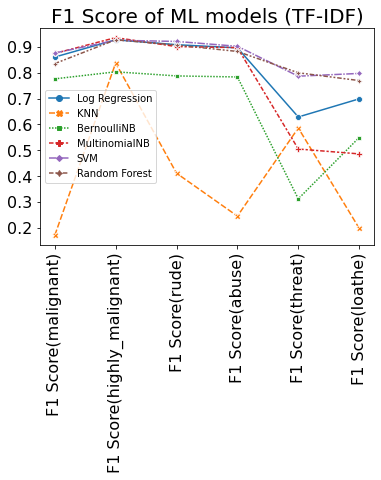

In [59]:
sns.lineplot(data=final_all_trp, markers=True)
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=20)

In [60]:
# Repeat this for CountVectorizer as well


# LinearSVM and Random Forest models perform best (purple and brown lines seem to be the highest).
# 
# Test if our code actually works. Probability of the comment falling in various categories should be output.
df_data_mal_done.head()

,comment_text,malignant
6,cocksucker before you piss around on my work,1
12,hey what is it talk what is it a...,1
16,bye don t look come or think of comming ba...,1
42,you are gay or antisemmitian archangel whit...,1
43,fuck your filthy mother in the ass dry,1


In [61]:
X = df_data_mal_done.comment_text
y = df_data_mal_done['malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
test.head()

,Unnamed: 0,comment_text
0,0,Yo bitch Ja Rule is more succesful then you'll...
1,1,== From RfC == \n\n The title is fine as it is...
2,2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,3,":If you have a look back at the source, the in..."
4,4,I don't anonymously edit articles at all.


In [63]:
# Sample Prediction
test_vect = tfv.transform(test['comment_text'])
randomforest.predict_proba(test_vect)[:,1]

array([0.92      , 0.12258283, 0.15674026, ..., 0.12492857, 0.1803355 ,
       0.7       ])

In [64]:
# LinearSVM and Random Forest models perform best (purple and brown lines seem to be the highest)

In [65]:
df_test= test.copy()
df_test

,Unnamed: 0,comment_text
0,0,Yo bitch Ja Rule is more succesful then you'll...
1,1,== From RfC == \n\n The title is fine as it is...
2,2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,3,":If you have a look back at the source, the in..."
4,4,I don't anonymously edit articles at all.
...,...,...
153159,153159,". \n i totally agree, this stuff is nothing bu..."
153160,153160,== Throw from out field to home plate. == \n\n...
153161,153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,153162,""" \n\n == """"One of the founding nations of the..."


In [67]:
df_test.to_csv('test_copy.csv')